In [ ]:
"""
House Pricing Prediction Program Guideline

Before running the program, ensure that you have the required libraries installed. You can install them using:
pip install numpy pandas matplotlib seaborn scikit-learn

1. Download the dataset ('kc_house_data.csv') and place it in the same directory as this script.

2. Open the terminal or command prompt and navigate to the directory containing this script.

3. Run the program by executing the following command:
   python house_pricing_prediction.py

4. Default Values and Variable Ranges:

   - 'date': Binary column (0 or 1)
   - 'bedrooms': Integer value representing the number of bedrooms. Example: 3
   - 'bathrooms': Float value representing the number of bathrooms. Example: 2.5
   - 'sqft_living': Numeric value for total living area in square feet. Example: 2000
   - 'sqft_lot': Numeric value for total lot area in square feet. Example: 5000
   - 'floors': Numeric value representing the number of floors. Example: 2
   - 'waterfront': Binary column (1 if true, 0 if false). Example: 1
   - 'view': Numeric index representing the quality of the view (0 to 4). Example: 3
   - 'condition': Numeric index representing the condition of the house (1 to 5). Example: 4
   - 'grade': Numeric index representing the overall grade given to the housing unit (1 to 13). Example: 8
   - 'sqft_above': Numeric value for square footage of the house apart from the basement. Example: 1800
   - 'sqft_basement': Numeric value for square footage of the basement. Example: 200
   - 'yr_built': Integer value representing the year the house was built. Example: 2000
   - 'yr_renovated': Integer value representing the year the house was last renovated. Example: 2015
   - 'zipcode': Numeric value representing the ZIP code of the property. Example: 98001
   - 'lat': Numeric value representing the latitude coordinate of the property. Example: 47.5
   - 'long': Numeric value representing the longitude coordinate of the property. Example: -122.2
   - 'sqft_living15': Numeric value for average living area of the 15 closest neighbors in square feet. Example: 2100
   - 'sqft_lot15': Numeric value for average lot area of the 15 closest neighbors in square feet. Example: 5500
   - 'safety_score': Numeric value representing the safety score of the area around the property. Example: 80
   - 'distance_to_public_transportation': Numeric value representing the distance to the nearest public transportation facility. Example: 500

   Note: Adjust the values for each feature according to your input.

5. After running the program, observe the output, including model scores, predictions, and visualizations.

6. For any questions or clarifications, please contact the author at [your email or contact information].

Happy predicting!
"""

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("kc_house_data.csv")

In [3]:
# Display the first few rows of the dataset
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,safety_score,distance_to_public_transportation
0,1225069038,20140505T000000,2280000.0,7,8,13540,307752,3.0,0,4,...,4130,1999,0,98053,47.6675,-121.986,4850,217800,2.926245,304.088420
1,6762700020,20141013T000000,7700000.0,6,8,12050,27600,2.5,0,3,...,3480,1910,1987,98102,47.6298,-122.323,3940,8800,10.000000,999.735224
2,9208900037,20140919T000000,6890000.0,6,8,9890,31374,2.0,0,4,...,1030,2001,0,98039,47.6305,-122.240,4540,42730,8.974004,896.774086
3,424049043,20140811T000000,450000.0,9,8,4050,6504,2.0,0,0,...,0,1996,0,98144,47.5923,-122.301,1448,3866,0.446847,68.494629
4,9175600025,20141007T000000,800000.0,7,6,7480,41664,2.0,0,2,...,2400,1953,0,98166,47.4643,-122.368,2810,33190,0.980994,119.939201


In [4]:
# Display statistical summary of the dataset
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,safety_score,distance_to_public_transportation
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,1.749826,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.660595,82.314786
std,2.876566e+09,3.673622e+05,0.930062,0.735597,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.485150,47.430767
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,20.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.371949,54.084287
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.548476,71.243871
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.802870,95.651962
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,10.000000,999.735224


<Figure size 1000x1000 with 0 Axes>

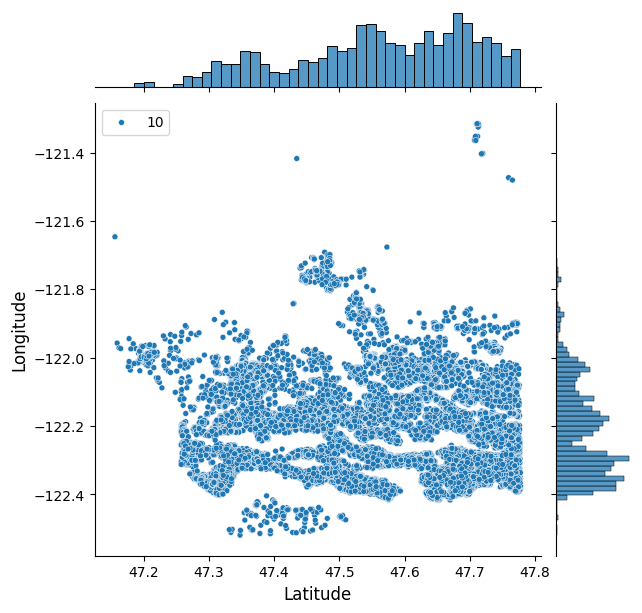

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [5]:
# Explore the geographical distribution of houses
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

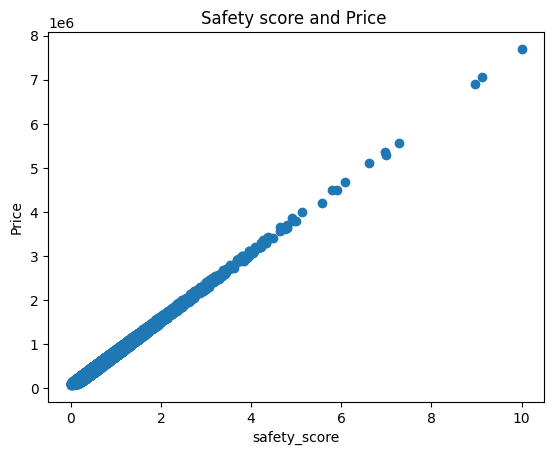

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [6]:
# Visualize the relationship between safety_score and price
plt.scatter(data.safety_score,data.price)
plt.title("Safety score and Price ")
plt.xlabel("safety_score")
plt.ylabel("Price")
plt.show()
sns.despine

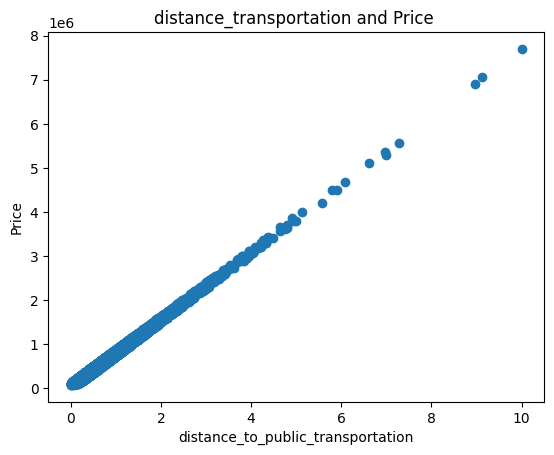

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [7]:
# Visualize the relationship between distance_transportation and price
plt.scatter(data.safety_score,data.price)
plt.title("distance_transportation and Price ")
plt.xlabel("distance_to_public_transportation")
plt.ylabel("Price")
plt.show()
sns.despine

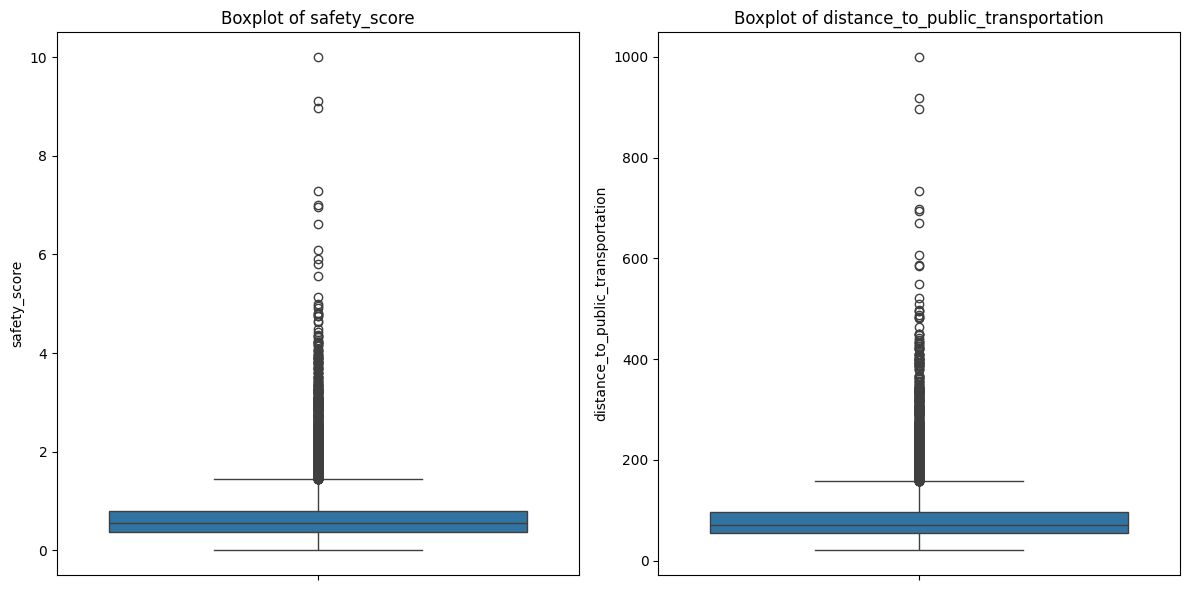

In [8]:
# Features of interest
features_ = ['safety_score', 'distance_to_public_transportation']

# Visualize the distribution of the selected features using box plots
plt.figure(figsize=(12, 6))

for i, feature in enumerate(features_, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=data[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [9]:
# Prepare the training data by dropping unnecessary columns
# i have not changed date here
train1 = data.drop(['id', 'price'],axis=1)

In [10]:
# Display the first few rows of the training data
train1.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,safety_score,distance_to_public_transportation
0,20140505T000000,7,8,13540,307752,3.0,0,4,3,12,...,4130,1999,0,98053,47.6675,-121.986,4850,217800,2.926245,304.088420
1,20141013T000000,6,8,12050,27600,2.5,0,3,4,13,...,3480,1910,1987,98102,47.6298,-122.323,3940,8800,10.000000,999.735224
2,20140919T000000,6,8,9890,31374,2.0,0,4,3,13,...,1030,2001,0,98039,47.6305,-122.240,4540,42730,8.974004,896.774086
3,20140811T000000,9,8,4050,6504,2.0,0,0,3,7,...,0,1996,0,98144,47.5923,-122.301,1448,3866,0.446847,68.494629
4,20141007T000000,7,6,7480,41664,2.0,0,2,3,11,...,2400,1953,0,98166,47.4643,-122.368,2810,33190,0.980994,119.939201


In [11]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression

In [12]:
# Initialize Linear Regression model
reg = LinearRegression()

In [13]:

labels = data['price']

# Convert 'date' column to binary (2014 or not)
conv_dates = [1 if values == 2014 else 0 for values in data.date]
data['date'] = conv_dates

# After changing date update train1
train1 = data.drop(['id', 'price'],axis=1)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:

# Split the data into training and testing sets
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

In [16]:
# Train the Linear Regression model
reg.fit(x_train,y_train)

LinearRegression()

In [17]:
# Evaluate the Linear Regression model
reg.score(x_test,y_test)

0.9940071607532529

In [18]:
# Import Gradient Boosting model
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 1000, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'squared_error')

In [19]:
# Train the Gradient Boosting model
clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=1000)

In [20]:
# Evaluate the Gradient Boosting model
clf.score(x_test,y_test)

0.9945237203877957

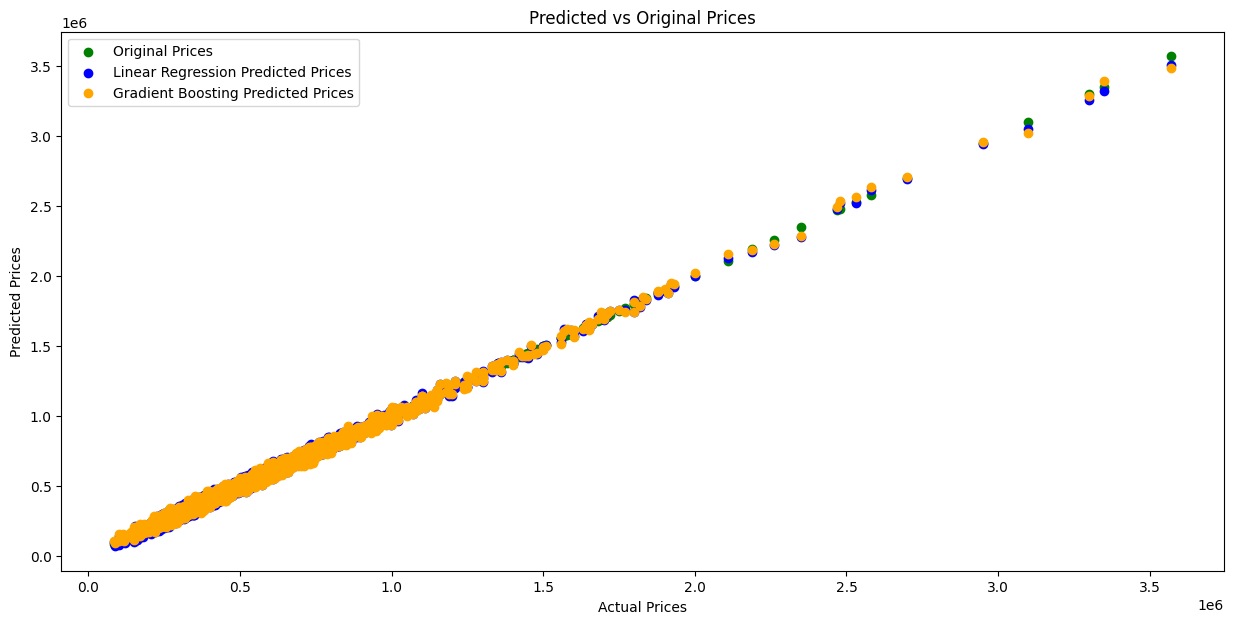

In [21]:
# Predicted prices using linear regression
linear_reg_prediction = reg.predict(x_test)

# Predicted prices using gradient boosting
gradient_boosting_prediction = clf.predict(x_test)

# Plotting the results
plt.figure(figsize=(15, 7))

# Plotting the original prices
plt.scatter(y_test, y_test, color="green", label="Original Prices")

# Plotting the predicted prices for linear regression x(y_test)(actual price)
plt.scatter(y_test, linear_reg_prediction, color="blue", label="Linear Regression Predicted Prices")

# Plotting the predicted prices for gradient boosting
plt.scatter(y_test, gradient_boosting_prediction, color="orange", label="Gradient Boosting Predicted Prices")

plt.title("Predicted vs Original Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.show()

In [22]:
# Make predictions on new data
new_data = pd.DataFrame({
    'date': [0],
    'bedrooms': [3],
    'bathrooms': [2],
    'sqft_living':[9890], 
    'sqft_lot':[31374],
    'floors': [2],
    'waterfront':[0],
    'view':[3],
    'condition':[2],
    'grade':[5],
    'sqft_above': [6420], 
    'sqft_basement': [850],
    'yr_built':[2013],
    'yr_renovated': [2015],
    'zipcode': [98040],
    'lat': [47.6648],
    'long': [-122.2],
    'sqft_living15':[3866], 
    'sqft_lot15':[43],
    'safety_score': [90],
    'distance_to_public_transportation': [300],
})

# Use the trained model for prediction
linear_reg_prediction = reg.predict(new_data)
gradient_boosting_prediction = clf.predict(new_data)

print(f"Linear Regression Prediction: {linear_reg_prediction}")
print(f"Gradient Boosting Regression Prediction: {gradient_boosting_prediction}")

Linear Regression Prediction: [26469104.70044218]
Gradient Boosting Regression Prediction: [3880201.09527737]
